In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
lifeExpectancy = pd.read_csv("datasets/lifeExpectancyAtBirth.csv")

In [10]:
lifeExpectancy.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21
1,Afghanistan,2019,Life expectancy at birth (years),Male,63.29
2,Afghanistan,2019,Life expectancy at birth (years),Female,63.16
3,Afghanistan,2015,Life expectancy at birth (years),Both sexes,61.65
4,Afghanistan,2015,Life expectancy at birth (years),Male,61.04


In [11]:
lifeExpectancy['Location'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Côte d’Ivoire',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Gree

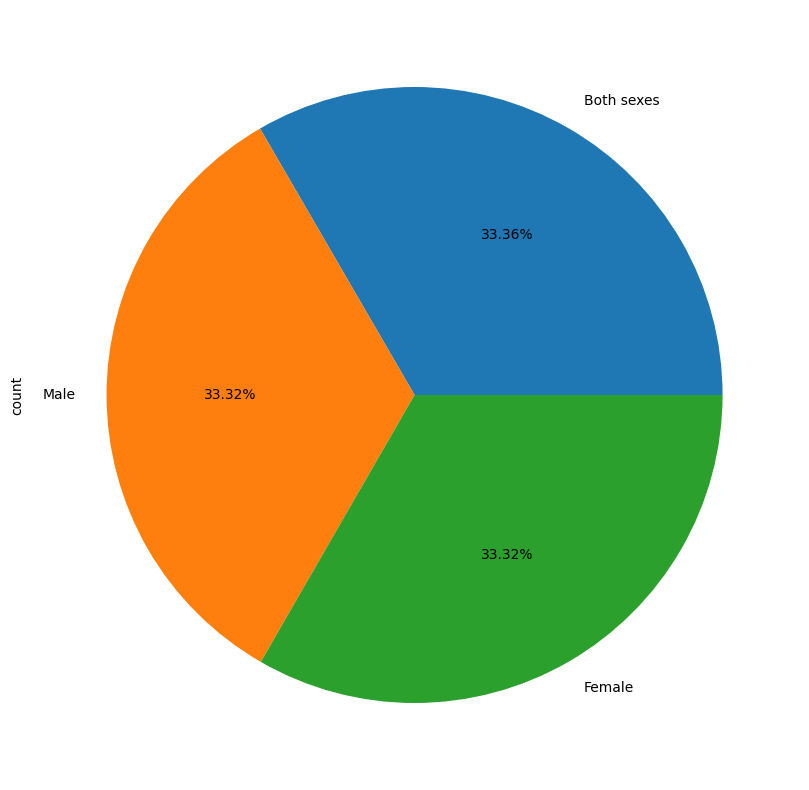

In [12]:
lifeExpectancy.Dim1.value_counts().plot(kind='pie',figsize=(10,10),autopct='%2.2f%%')
plt.show()

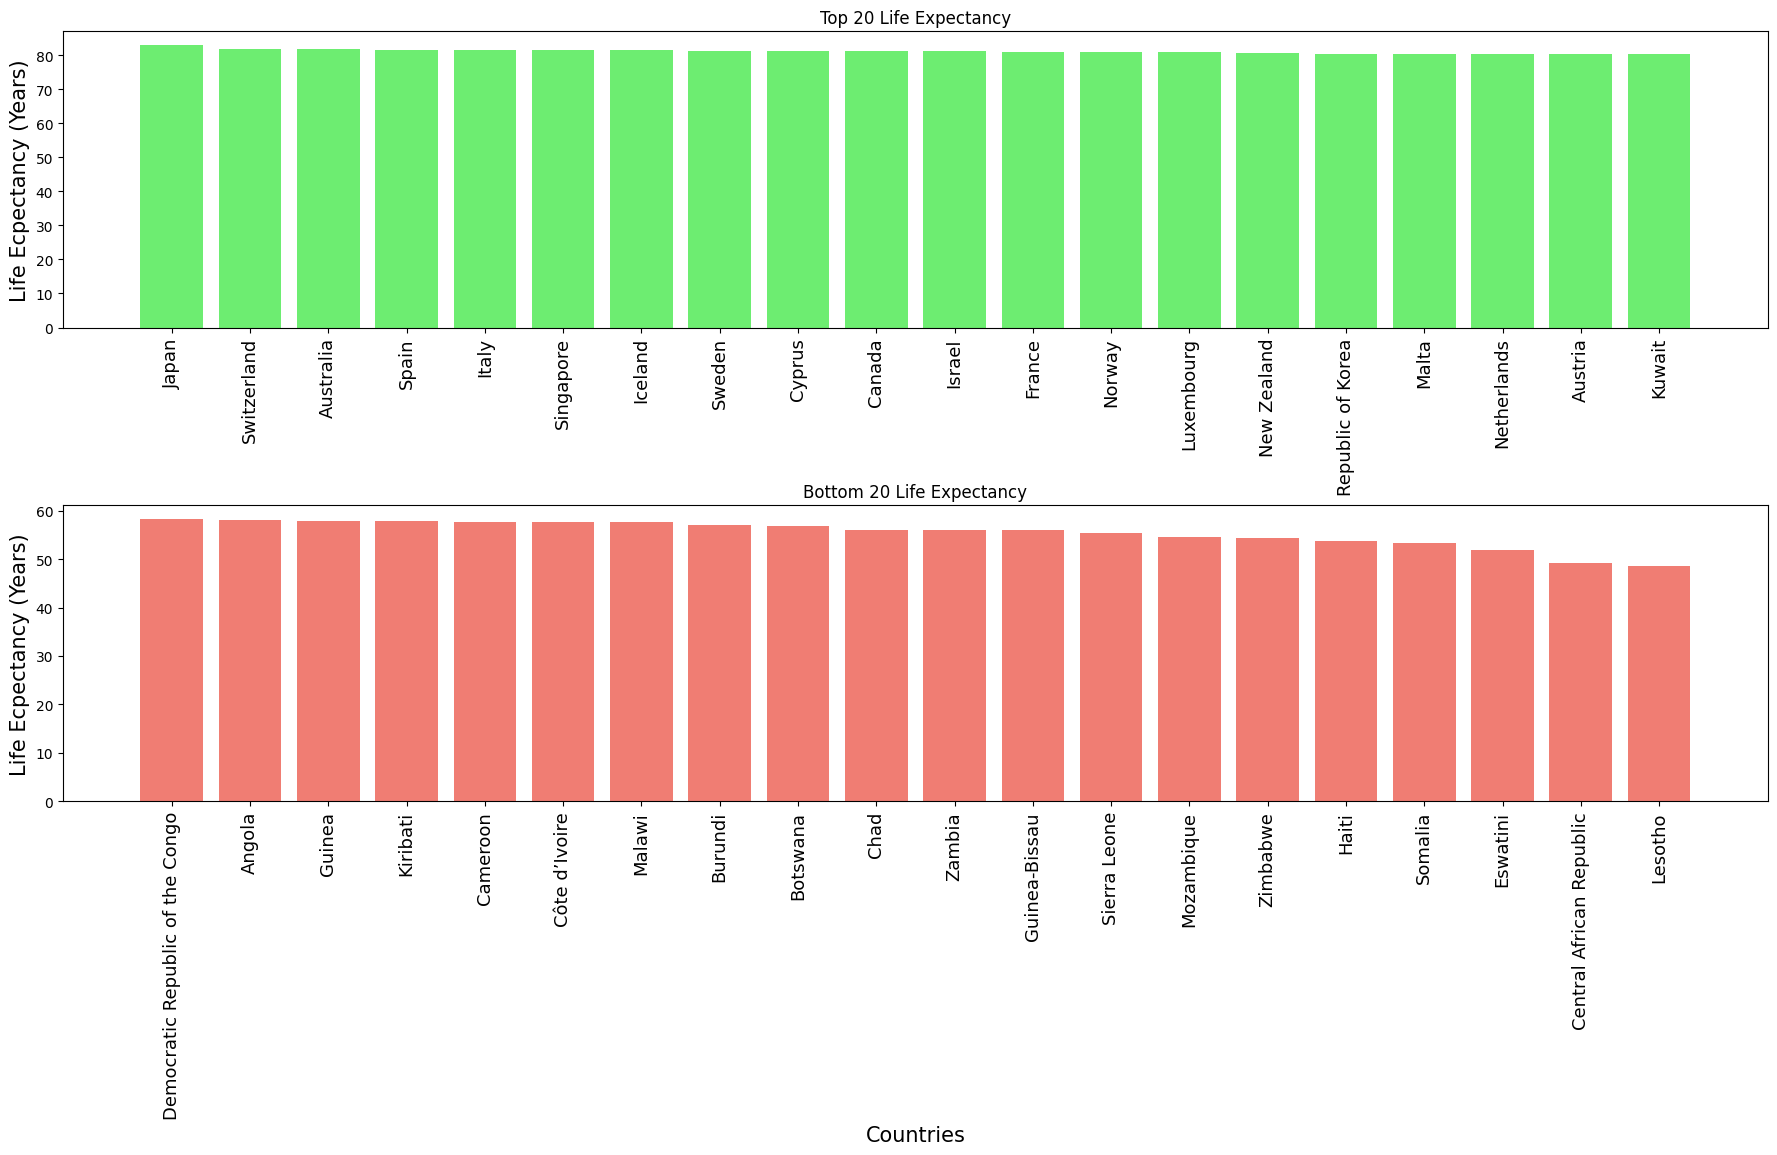

In [13]:
tempData = lifeExpectancy.groupby('Location')['First Tooltip'].mean()
tempDataTop20 = tempData.sort_values(ascending=False)[:20]
tempDataLow20 = tempData.sort_values()[:20]
tempDataTop20 = tempDataTop20.reset_index()
tempDataLow20 = tempDataLow20.reset_index()
fig = plt.figure(figsize = (22,10))

ax1 = plt.subplot2grid((2,1), (0,0), rowspan=1, colspan=1)
ax1.bar(x = tempDataTop20['Location'], height = tempDataTop20['First Tooltip'], color = "#6ded71")
ax1.set_xticklabels(tempDataTop20['Location'], rotation=90,size=13)
ax1.set_ylabel("Life Ecpectancy (Years)",size=15)
ax1.title.set_text("Top 20 Life Expectancy")    

ax2 = plt.subplot2grid((2,1), (1,0), rowspan=1, colspan=1)
ax2.bar(x = tempDataLow20['Location'][::-1], height = tempDataLow20['First Tooltip'][::-1], color = "#f07d73")
ax2.title.set_text("Bottom 20 Life Expectancy")

plt.xticks(rotation = 90, size=13)
plt.xlabel("Countries",size=15)
plt.ylabel("Life Ecpectancy (Years)",size=15)
plt.subplots_adjust(hspace = 0.6)
plt.show()

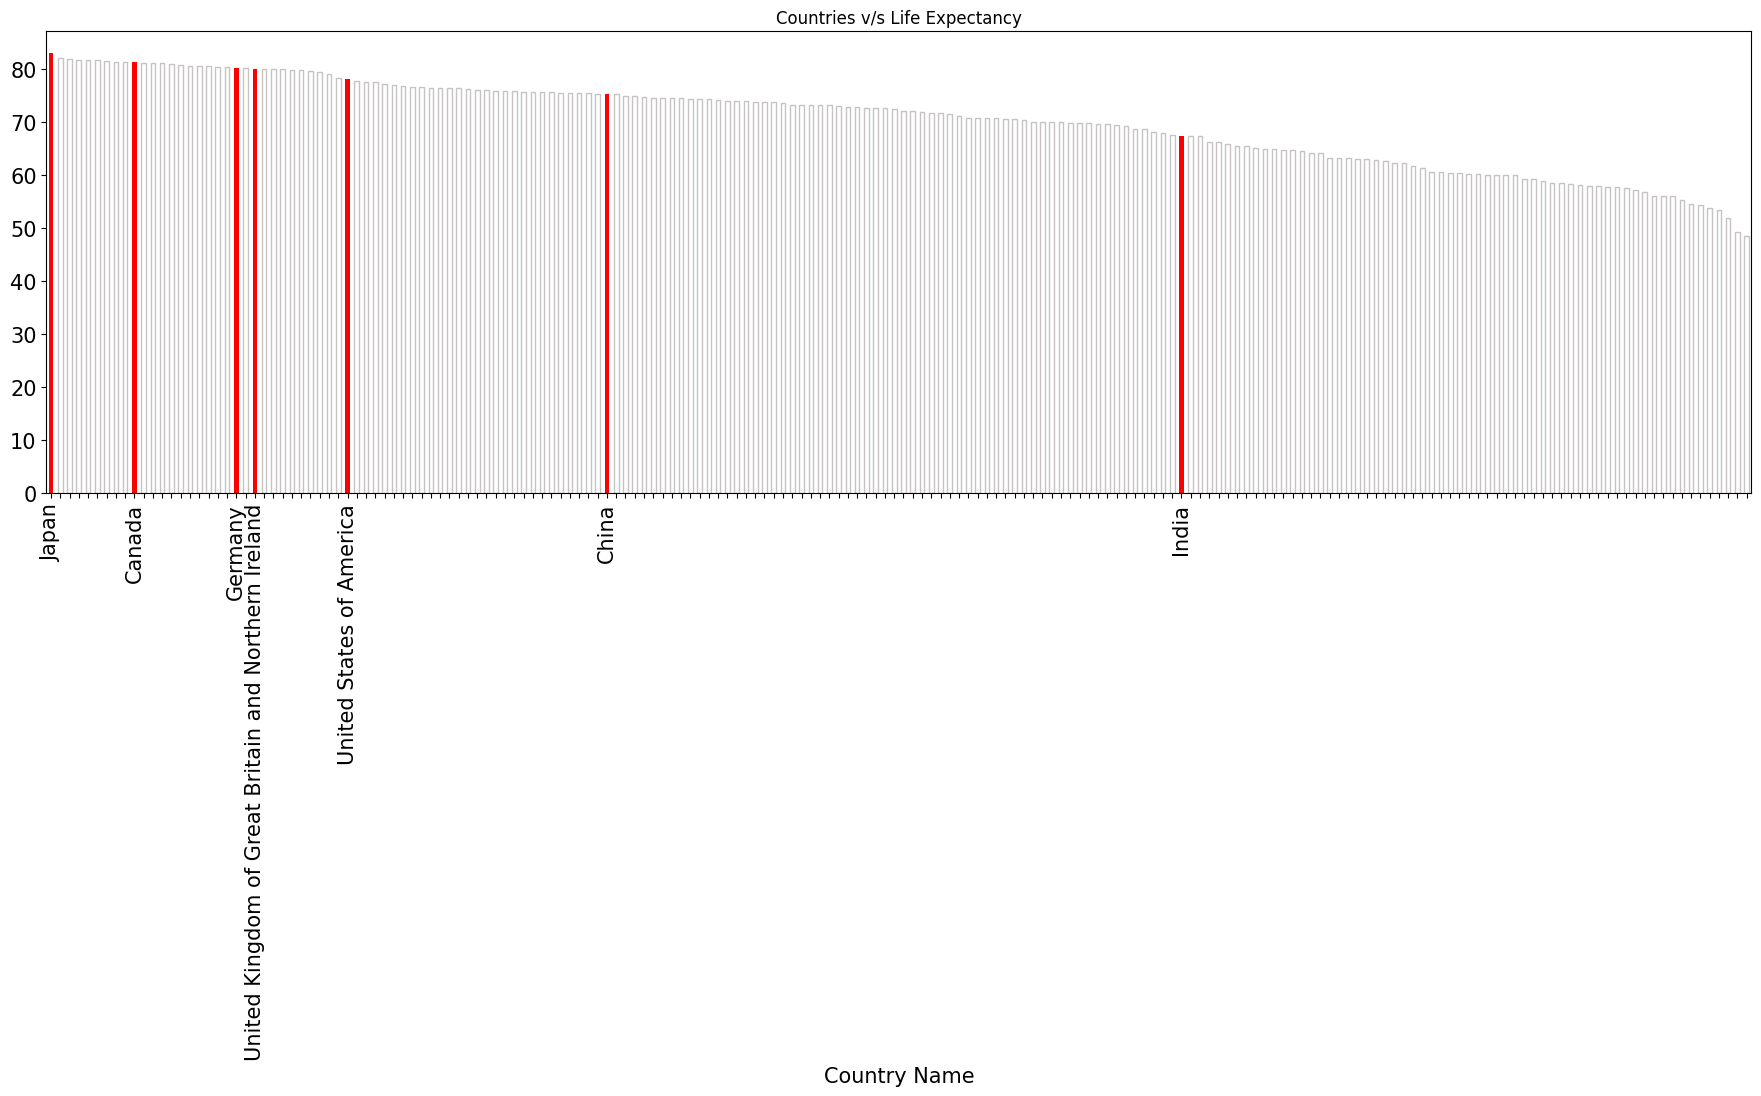

In [14]:
tempData = lifeExpectancy.groupby('Location')['First Tooltip'].mean()
tempData = tempData.sort_values(ascending=False)
tempData = tempData.reset_index()
tempData.set_index('Location',drop=True,inplace=True)

countries=['India', 'China', 'United States of America', 'Germany',
           'United Kingdom of Great Britain and Northern Ireland', 
           'Japan', 'Canada']


ax_1 = tempData['First Tooltip'].plot(kind='bar', title ="Countries v/s Life Expectancy", figsize=(22, 6), fontsize=15)
ax_1.set_xlabel("Country Name", fontsize=15)
for ticks in ax_1.xaxis.get_major_ticks():
    if ticks.label1.get_text() not in countries:
        ticks.label1.set_visible(False)
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('w')
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('#c7c3c3')
    else:
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('r')

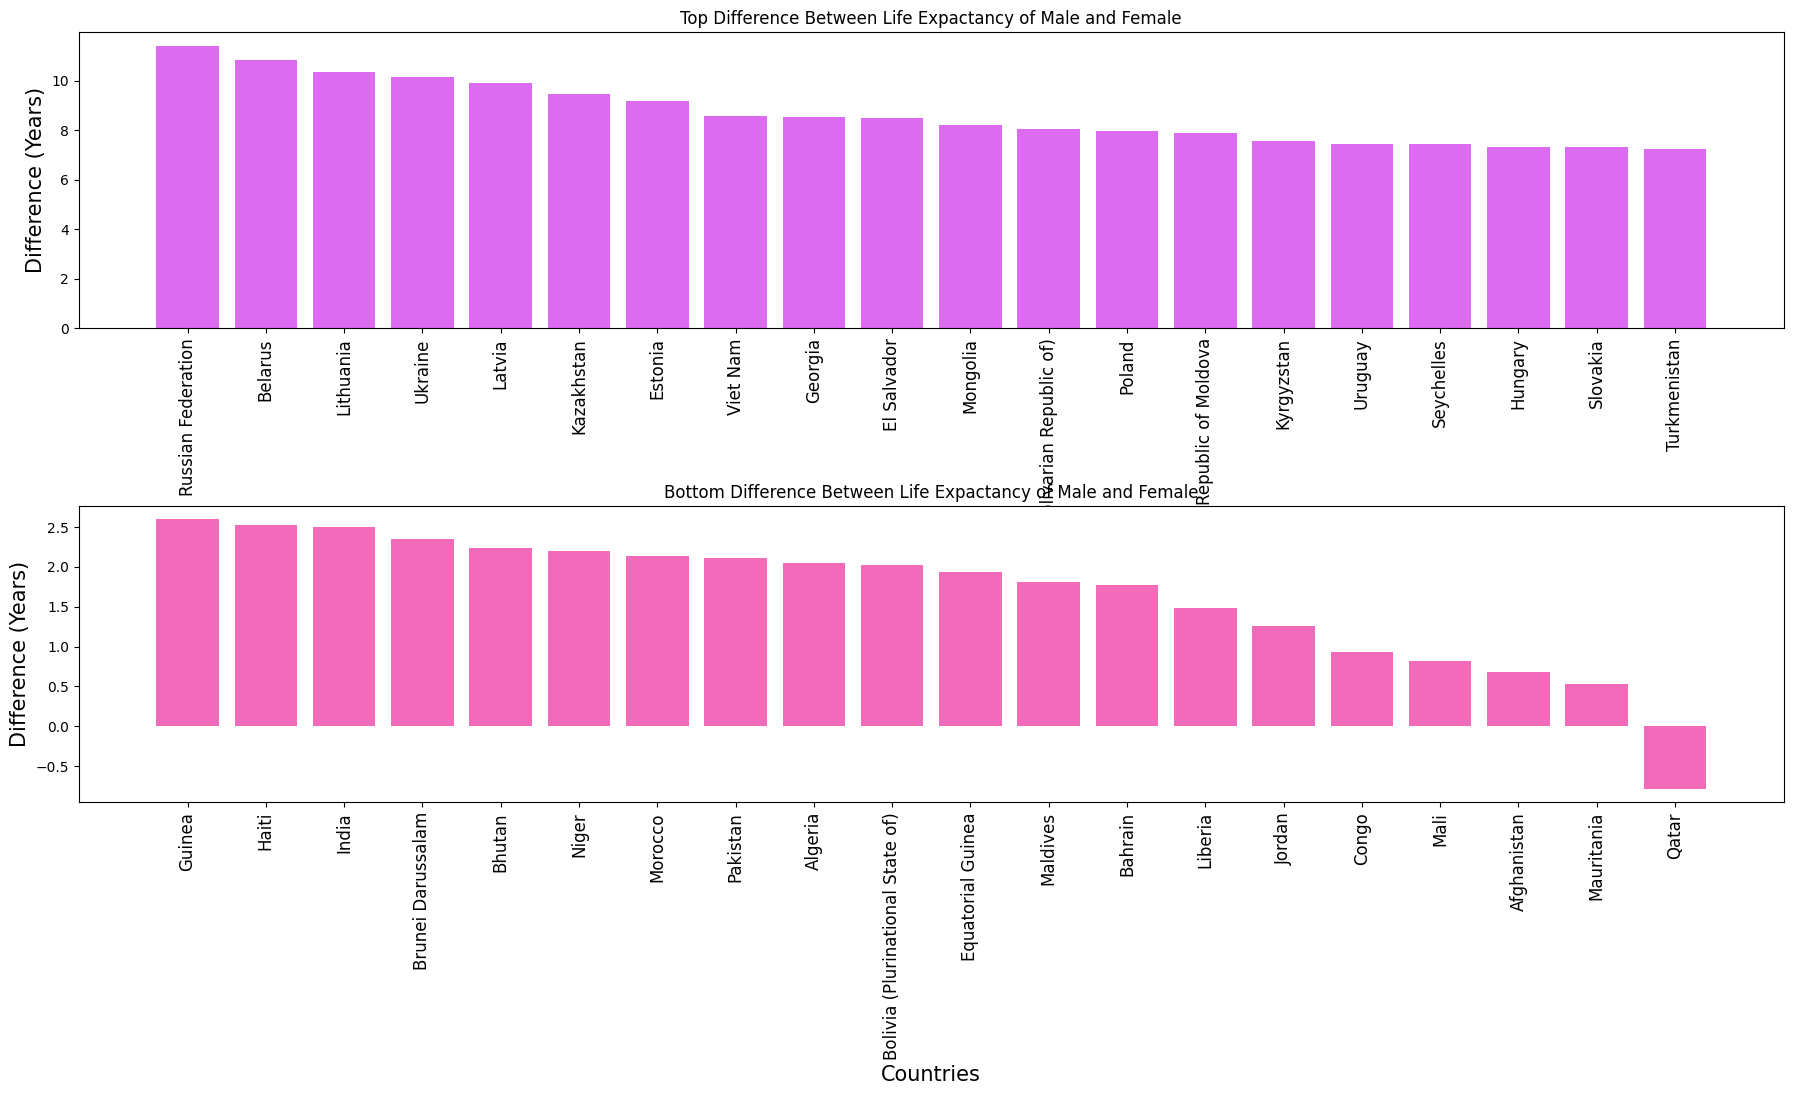

In [15]:
tempDataM = lifeExpectancy[lifeExpectancy['Dim1'] == 'Male']
tempDataF = lifeExpectancy[lifeExpectancy['Dim1'] == 'Female']
tempDataM.reset_index(inplace = True)
tempDataF.reset_index(inplace = True)
tempData = tempDataM.join(tempDataF, lsuffix = "_m", rsuffix = "_f")
tempData['LE_diff'] = tempData['First Tooltip_f'] - tempData['First Tooltip_m']
tempDataCountries = tempData.groupby("Location_m")['LE_diff'].mean()
tempDataCountriesTop = tempDataCountries.sort_values(ascending = False)[:20]
tempDataCountriesTop = tempDataCountriesTop.reset_index()

tempDataCountriesBot = tempDataCountries.sort_values()[:20]
tempDataCountriesBot = tempDataCountriesBot.reset_index()

fig = plt.figure(figsize = (22,10))

ax1 = plt.subplot2grid((2,1), (0,0), rowspan=1, colspan=1)
ax1.bar(x = tempDataCountriesTop['Location_m'], height = tempDataCountriesTop['LE_diff'], color = "#dc6bf2")
ax1.set_xticklabels(tempDataCountriesTop['Location_m'], rotation=90,size=12)
ax1.set_ylabel("Difference (Years)",size=15)
ax1.title.set_text("Top Difference Between Life Expactancy of Male and Female")

ax2 = plt.subplot2grid((2,1), (1,0), rowspan=1, colspan=1)
ax2.bar(x = tempDataCountriesBot['Location_m'][::-1], height = tempDataCountriesBot['LE_diff'][::-1], color = "#f26bba")
ax2.title.set_text("Bottom Difference Between Life Expactancy of Male and Female")

plt.xticks(rotation = 90,size=12)
plt.xlabel("Countries",size=15)
plt.ylabel("Difference (Years)",size=15)
plt.subplots_adjust(hspace = 0.6)
plt.show()

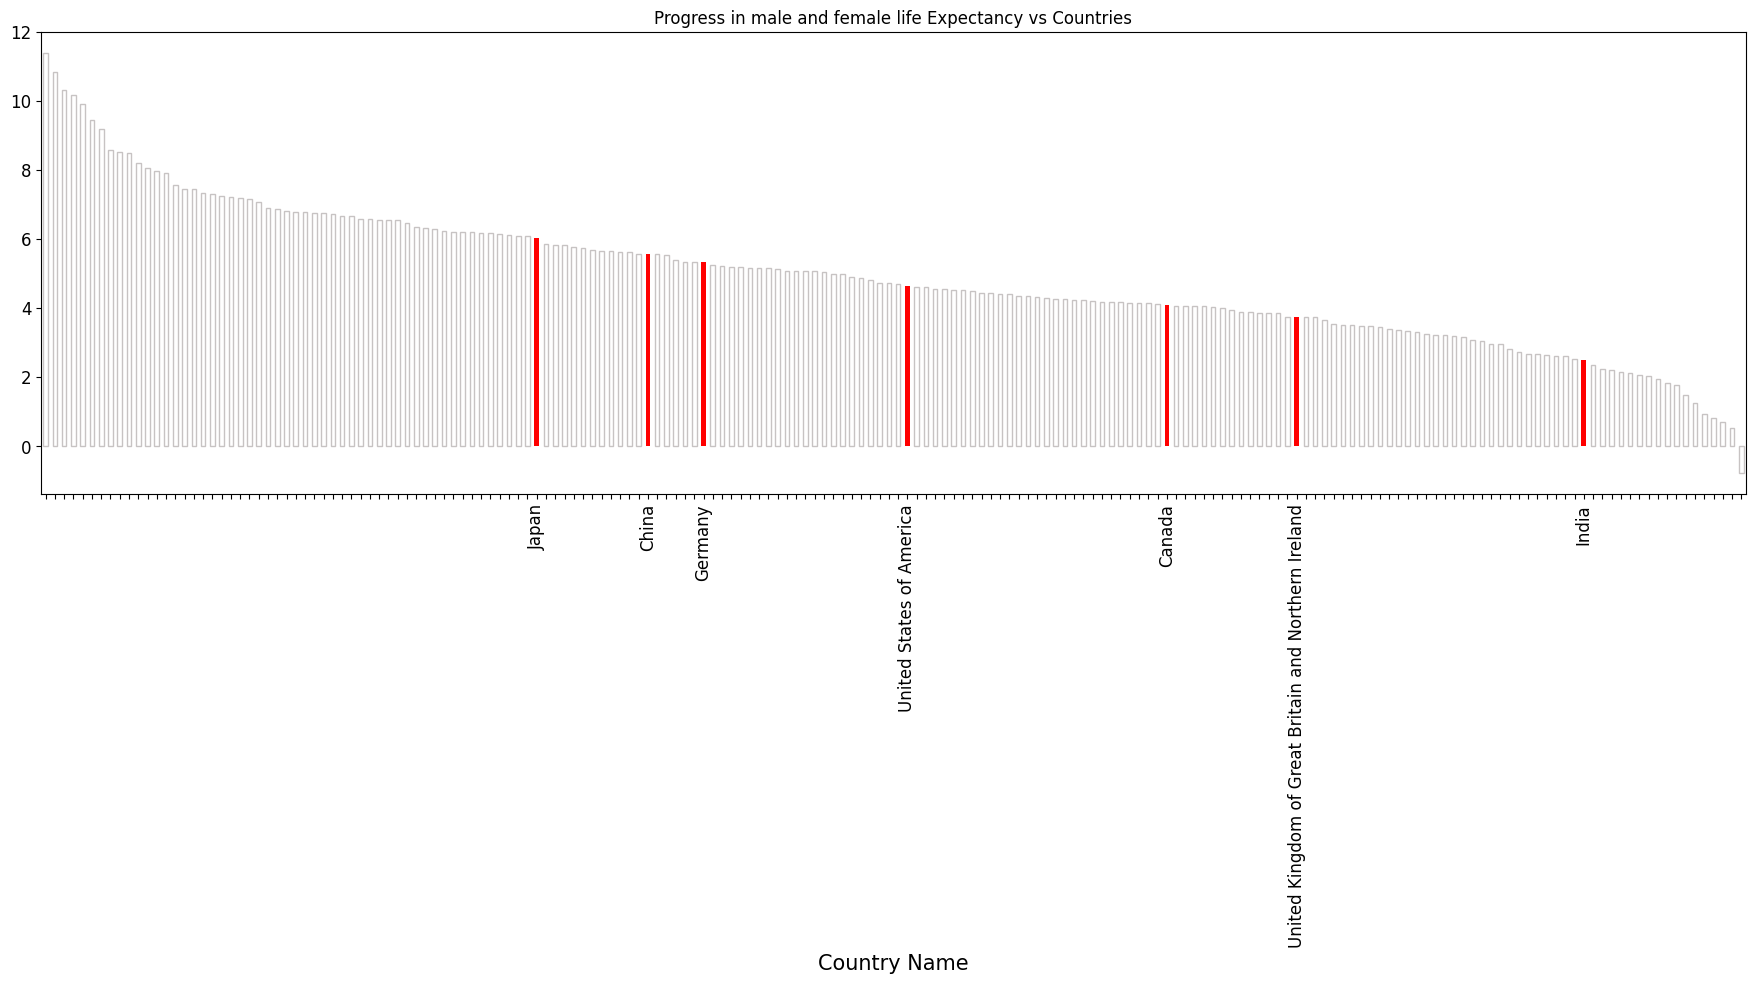

In [16]:
tempDataM = lifeExpectancy[lifeExpectancy['Dim1'] == 'Male']
tempDataF = lifeExpectancy[lifeExpectancy['Dim1'] == 'Female']
tempDataM.reset_index(inplace = True)
tempDataF.reset_index(inplace = True)
tempData = tempDataM.join(tempDataF, lsuffix = "_m", rsuffix = "_f")
tempData['LE_diff'] = tempData['First Tooltip_f'] - tempData['First Tooltip_m']
tempDataCountries = tempData.groupby("Location_m")['LE_diff'].mean()
tempDataCountries = tempDataCountries.sort_values(ascending = False)
tempDataCountries = tempDataCountries.reset_index()
tempDataCountries.set_index('Location_m',drop=True,inplace=True)

countries=['India', 'China', 'United States of America', 'Germany',
           'United Kingdom of Great Britain and Northern Ireland', 
           'Japan', 'Canada']

ax_1 = tempDataCountries['LE_diff'].plot(kind='bar', title ="Progress in male and female life Expectancy vs Countries", figsize=(22, 6), fontsize=12)
ax_1.set_xlabel("Country Name", fontsize=15)
for ticks in ax_1.xaxis.get_major_ticks():
    if ticks.label1.get_text() not in countries:
        ticks.label1.set_visible(False)
        ax_1.patches[tempDataCountries.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('w')
        ax_1.patches[tempDataCountries.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('#c7c3c3')
    else:
        ax_1.patches[tempDataCountries.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('r')

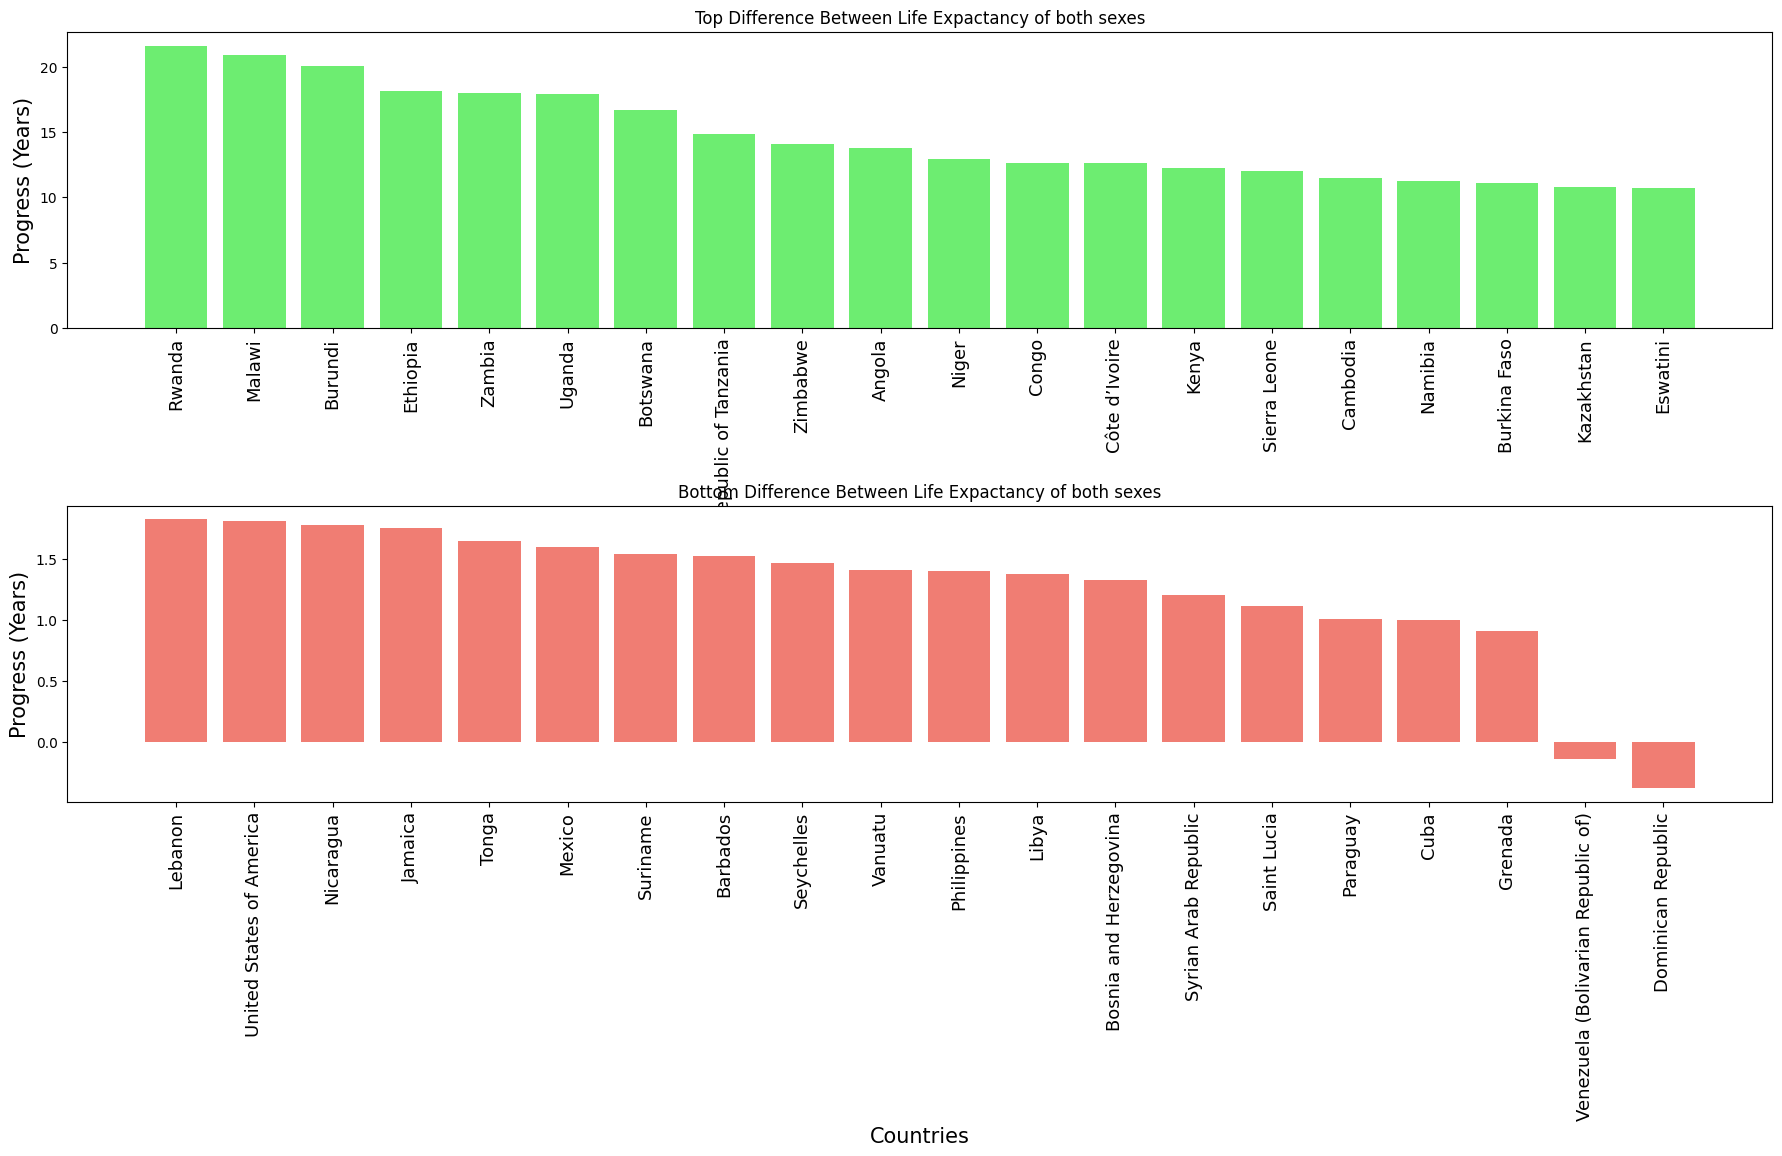

In [17]:
tempData2000 = lifeExpectancy[(lifeExpectancy['Period'] == 2000) & (lifeExpectancy['Dim1'] == "Both sexes")]
tempData2019 = lifeExpectancy[(lifeExpectancy['Period'] == 2019) & (lifeExpectancy['Dim1'] == "Both sexes")]
tempData2000.reset_index(inplace = True)
tempData2019.reset_index(inplace = True)
tempData = tempData2000.join(tempData2019, lsuffix = "_00", rsuffix="_19")
tempData['progress'] = tempData['First Tooltip_19'] - tempData['First Tooltip_00']
tempDataTrimmed = tempData[['Location_00', 'progress']]
tempDataTrimmed.sort_values(by=['progress'], ascending=False, inplace=True)
tempDataTrimmedTop = tempDataTrimmed[:20].copy()
tempDataTrimmedBot = tempDataTrimmed[-20:].copy()

fig = plt.figure(figsize=(22,10))
ax1 = plt.subplot2grid((2,1), (0,0), rowspan=1, colspan=1)
ax1.bar(x=tempDataTrimmedTop['Location_00'], height=tempDataTrimmedTop['progress'], color = "#6ded71")
ax1.set_xticklabels(tempDataTrimmedTop['Location_00'], rotation=90,size=13)
ax1.set_ylabel("Progress (Years)",size=15)
ax1.title.set_text("Top Difference Between Life Expactancy of both sexes")


ax2 = plt.subplot2grid((2,1), (1,0), rowspan=1, colspan=1)
ax2.bar(x=tempDataTrimmedBot['Location_00'], height=tempDataTrimmedBot['progress'], color = "#f07d73")
ax2.set_xticklabels(tempDataTrimmedBot['Location_00'], rotation=90,size=13)
ax2.set_ylabel("Progress (Years)",size=15)
ax2.set_xlabel('Countries',size=15)
ax2.title.set_text("Bottom Difference Between Life Expactancy of both sexes")


plt.subplots_adjust(hspace = 0.6)
plt.show()

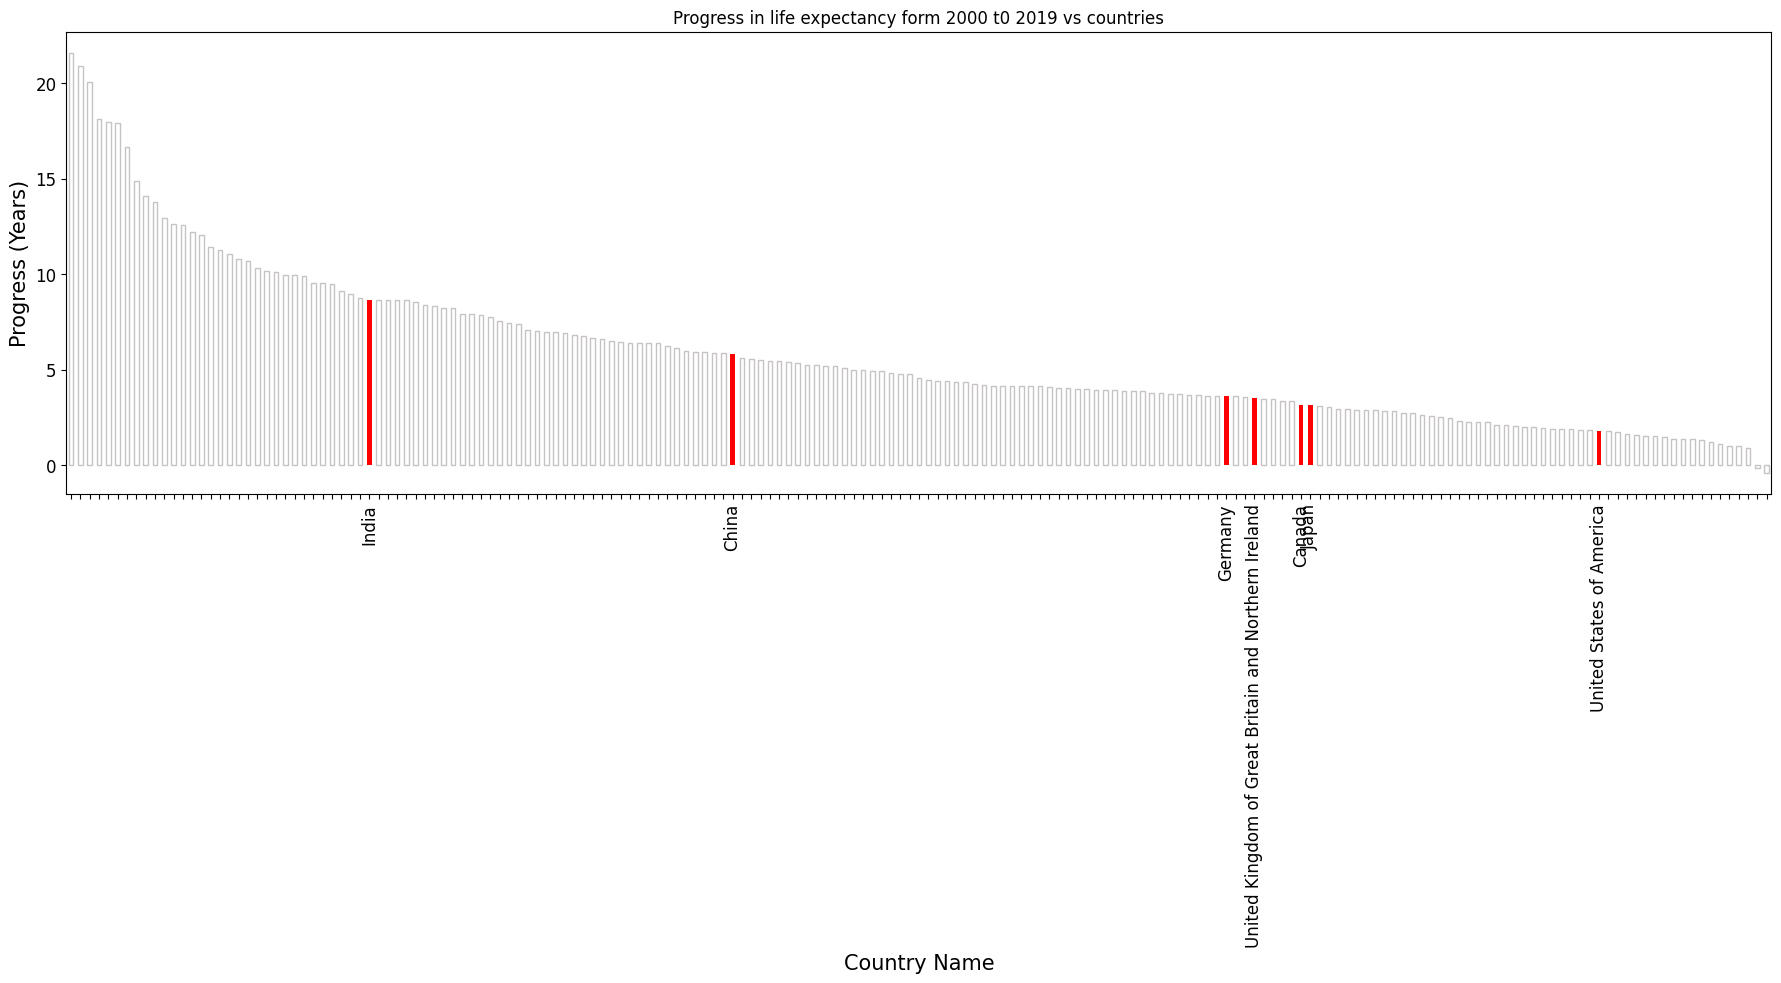

In [18]:
tempData2000 = lifeExpectancy[(lifeExpectancy['Period'] == 2000) & (lifeExpectancy['Dim1'] == "Both sexes")]
tempData2019 = lifeExpectancy[(lifeExpectancy['Period'] == 2019) & (lifeExpectancy['Dim1'] == "Both sexes")]
tempData2000.reset_index(inplace = True)
tempData2019.reset_index(inplace = True)
tempData = tempData2000.join(tempData2019, lsuffix = "_00", rsuffix="_19")
tempData['progress'] = tempData['First Tooltip_19'] - tempData['First Tooltip_00']
tempDataTrimmed = tempData[['Location_00', 'progress']]
tempDataTrimmed.sort_values(by=['progress'], ascending=False, inplace=True)
tempDataTrimmed.set_index('Location_00', drop=True, inplace=True)

countries=['India', 'China', 'United States of America', 'Germany',
           'United Kingdom of Great Britain and Northern Ireland', 
           'Japan', 'Canada']

ax_1 = tempDataTrimmed['progress'].plot(kind='bar', figsize=(22,6), title = 'Progress in life expectancy form 2000 t0 2019 vs countries', fontsize=12)
ax_1.set_xlabel("Country Name", fontsize=15)
ax_1.set_ylabel("Progress (Years)",size=15)
for ticks in ax_1.xaxis.get_major_ticks():
    if ticks.label1.get_text() not in countries:
        ticks.label1.set_visible(False)
        ax_1.patches[tempDataTrimmed.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('w')
        ax_1.patches[tempDataTrimmed.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('#c7c3c3')
    else:
        ax_1.patches[tempDataTrimmed.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('r')

In [19]:
lifeExpectancy.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21
1,Afghanistan,2019,Life expectancy at birth (years),Male,63.29
2,Afghanistan,2019,Life expectancy at birth (years),Female,63.16
3,Afghanistan,2015,Life expectancy at birth (years),Both sexes,61.65
4,Afghanistan,2015,Life expectancy at birth (years),Male,61.04


In [20]:
df = lifeExpectancy['Location']

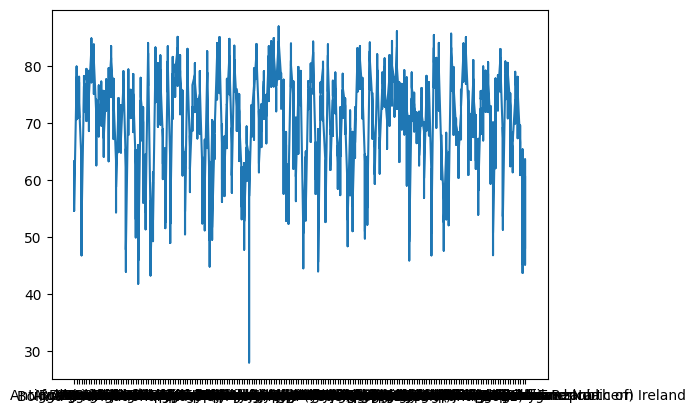

<Figure size 2000x1000 with 0 Axes>

In [21]:
fig = plt.plot(df,lifeExpectancy['First Tooltip'])
plt.figure(figsize=(20,10))
plt.show()

In [22]:
df_gender = lifeExpectancy['Dim1'].value_counts()

In [23]:
df_gender = pd.DataFrame(df_gender)

In [24]:
df_gender

,count
Dim1,
Both sexes,733
Male,732
Female,732


IndexError: list index out of range

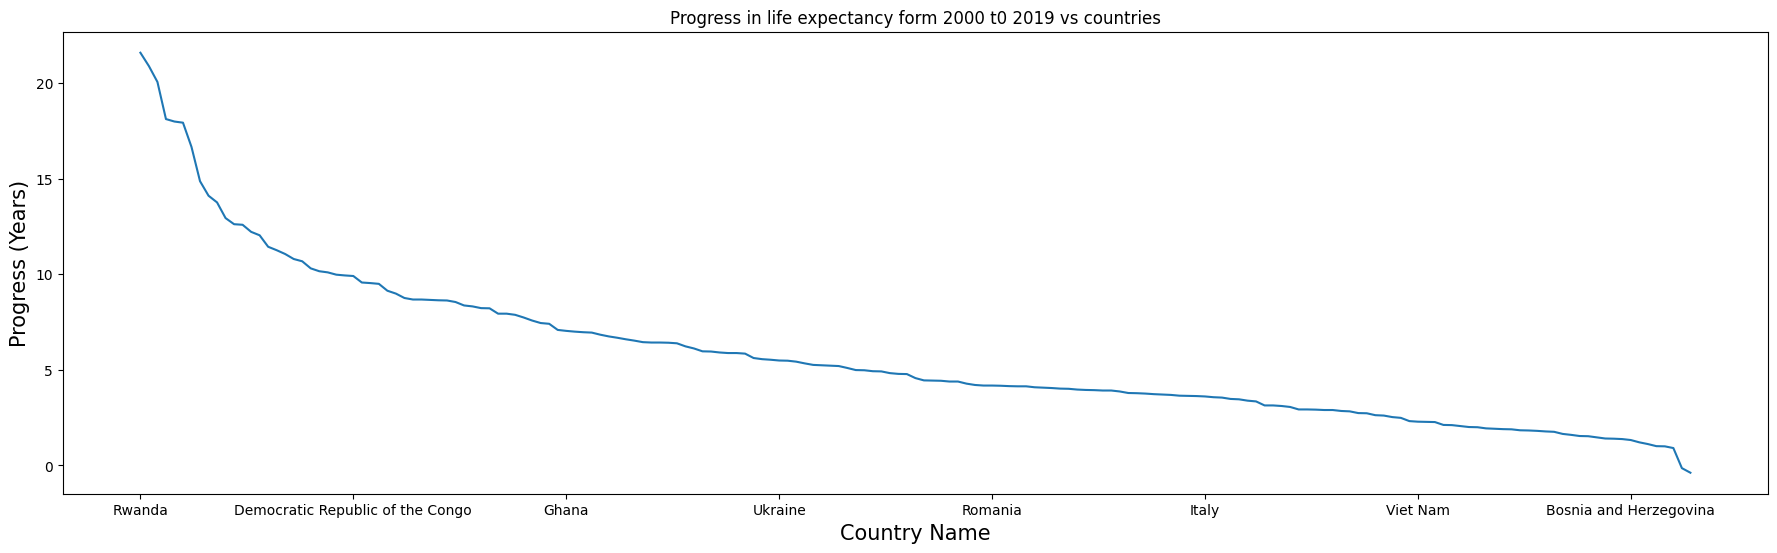

In [25]:
tempData2000 = lifeExpectancy[(lifeExpectancy['Period'] == 2000) & (lifeExpectancy['Dim1'] == "Both sexes")]
tempData2019 = lifeExpectancy[(lifeExpectancy['Period'] == 2019) & (lifeExpectancy['Dim1'] == "Both sexes")]
tempData2000.reset_index(inplace = True)
tempData2019.reset_index(inplace = True)
tempData = tempData2000.join(tempData2019, lsuffix = "_00", rsuffix="_19")
tempData['progress'] = tempData['First Tooltip_19'] - tempData['First Tooltip_00']
tempDataTrimmed = tempData[['Location_00', 'progress']]
tempDataTrimmed.sort_values(by=['progress'], ascending=False, inplace=True)
tempDataTrimmed.set_index('Location_00', drop=True, inplace=True)

countries=['India', 'China', 'United States of America', 'Germany',
           'United Kingdom of Great Britain and Northern Ireland', 
           'Japan', 'Canada']

ax_1 = tempDataTrimmed['progress'].plot(kind='line', figsize=(22,6), title = 'Progress in life expectancy form 2000 t0 2019 vs countries')
ax_1.set_xlabel("Country Name", fontsize=15)
ax_1.set_ylabel("Progress (Years)",size=15)
for ticks in ax_1.xaxis.get_major_ticks():
    if ticks.label1.get_text() not in countries:
        ticks.label1.set_visible(False)
        ax_1.patches[tempDataTrimmed.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('w')
        ax_1.patches[tempDataTrimmed.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('#c7c3c3')
    else:
        ax_1.patches[tempDataTrimmed.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('r')